# Today
* Data analysis using linear regression

# Loading a multidimensional data set

Let's load up a data-set of English Premier League players' information:

In [1]:
import numpy as np
import csv

with open('epl.csv', 'r') as f:
    data_list = list(csv.reader(f))

print 'number of rows = ', len(data_list)
print 'row 0 = ', data_list[0]
print 'row 1 = ', data_list[1]
print 'row 2 = ', data_list[2]

number of rows =  527
row 0 =  ['Team', 'Player', 'Number', 'Position', 'Age', 'Height', 'Weight']
row 1 =  ['Arsenal', 'Aaron Ramsey', '16', 'M ', '24', '70', '168']
row 2 =  ['Arsenal', 'Alex Oxlade-Chamberlain', '15', 'M ', '22', '71', '154']


Let's set up numpy arrays to store the heights and weights. First, we need to figure out how many data points there are: 

In [2]:
# number of data points
N = len(data_list) - 1    # remove 1 because first line was just labels
N

526

Now we can populate numpy arrays: 

In [3]:
heights = np.zeros(N)
weights = np.zeros(N)

for i in range(1,N+1):
    heights[i - 1] = data_list[i][5]   # height was at index 5
    weights[i - 1] = data_list[i][6]   # weight was at index 6
    
print heights[:10]
print weights[:10]

[ 70.  71.  67.  72.  72.  72.  70.  73.  70.  68.]
[ 168.  154.  154.  146.  161.  174.  163.  159.  163.  143.]


# Linear Regression: Modeling the relationship between variables 

First let's examine the relationship between height and weight:

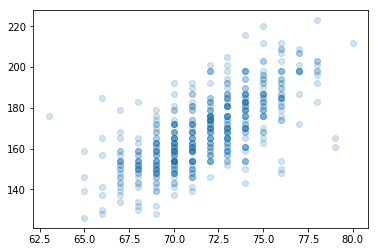

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(heights, weights, alpha=0.2)  # alpha makes the dots a little transparent

On a height-weight pair $(x_i, y_i)$ from our data-set, a linear model guesses a weight $y = ax_i + b$, while the actual weight is $y_i$. The total (squared) error between prediction and actual value over all data points is:

$$E(a,b) = \sum_{i=1}^{N} ((ax_i + b) - y_i)^2$$

**Aside:** "Why squared error and not sum of absolute values?" you might say. Both are good options, but there are good reasons to go for squared error as the first choice. It's a long story but it has something to do with the Gaussian distribution being similar to $e^{-x^2}$.

**Question** What is the linear relationship between the height and weight of a soccer player that is most likely to have yielded the scatter plot?

**Answer** The one for which the values of $a$ and $b$ minimize $E(a,b)$. 

**Approach:** 

1. Solve the "normal equations", $\nabla E(a,b) = 0$. The gradient will be zero at a local minimum. 
2. Use gradient descent.

# Method 1: Solve the normal equations 

Solve gradient = 0. You write down the partial derivatives and solve the linear equations for $a$ and $b$. 

![Linear Regression by Hand](https://www.math.uci.edu/~isik/teaching/17W_MATH9/notes/regression_by_hand.jpg)

Let's code it up. 

In [5]:
X = heights
Y = weights
S1 = np.sum(X)
S2 = np.sum(X * X)  # sum of x_i * x_i
SM = np.sum(X * Y)  # sum of x_i * y_i
SY = np.sum(Y)
a = (1 / (N*S2 - S1*S1)) * (N * SM - S1 * SY)
b = (1 / (N*S2 - S1*S1)) * (- S1 * SM + S2 * SY)

With the optimal values of $a$ and $b$ in hand, we may now compute the optimal (best-fit) linear relationship between height and weight. Let's superimpose the line on the scatter plot: 

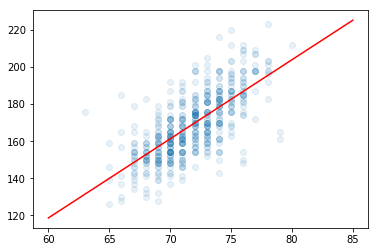

In [6]:
XX = np.linspace(60,85,200)
YY = a * XX + b
plt.scatter(heights, weights, alpha=0.1)
plt.plot(XX, YY, "r")

# The scikit-learn way

No need to be a hero every time. We can use sklearn's `LinearRegression()` model.

You fit (train) the model by using the `fit` function and you use the function it finds, i.e. make predictions, using the `predict` function. 

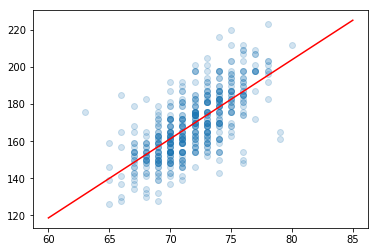

In [7]:
from sklearn import linear_model
my_model = linear_model.LinearRegression()
my_model.fit(heights.reshape((N,1)), weights.reshape((N,1)))
XX = np.linspace(60,85,200).reshape((-1,1))
YY = my_model.predict(XX)
plt.scatter(heights, weights, alpha=0.2)
plt.plot(XX, YY, "r")